Find the best hedge funds (pure hedge fund, no AM), and do analysis.

Citadel, millennium, Balyasny, Point 72, AQR

Analysis: what their portfolio looks like, common points, data exploration, etc. 

For analysis on hedge fund:
- Citadel: 16210
- Millennium: 57986
- BALYASNY: 7808
- POINT72: 75106
- AQR: 6132

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

import warnings
warnings.filterwarnings('ignore')

# Holdings

In [2]:
import pyarrow.parquet as pq

# Specify the path to your parquet.gzip file
parquet_file_path = '../data/holdings_all_hf.parquet.gzip'

# Read the Parquet file using pyarrow
holdings = pq.read_table(parquet_file_path)

# Convert the table to a Pandas DataFrame if needed
holdings = holdings.to_pandas()

holdings = holdings.reset_index()

In [3]:
holdings = holdings[holdings['mgrno'].isin([16210, 57986, 7808, 75106, 6132])]
holdings = holdings[['date', 'mgrno', 'shares_adj', 'trade', 'prc', 'vol', 'openprc',
       'askhi', 'bidlo', 'ret', 'shrout','comnam', 'ticker', 'gics1', 'gics2', 'year', 'permno']]
holdings

,date,mgrno,shares_adj,trade,prc,vol,openprc,askhi,bidlo,ret,shrout,comnam,ticker,gics1,gics2,year,permno
2,2015-06-30,6132.0,14863.0,-4782.0,110.67000,76532.0,111.01000,112.33500,109.98000,-0.001714,18692.0,J & J SNACK FOODS CORP,JJSF,Consumer Staples,"Food, Beverage & Tobacco",2015.0,10026
52,2015-09-30,6132.0,12693.0,-2170.0,113.66000,206595.0,113.88000,114.20000,112.60000,0.007803,18676.0,J & J SNACK FOODS CORP,JJSF,Consumer Staples,"Food, Beverage & Tobacco",2015.0,10026
100,2015-12-31,6132.0,10619.0,-2074.0,116.67000,104909.0,119.16000,119.70000,116.66000,-0.021635,18677.0,J & J SNACK FOODS CORP,JJSF,Consumer Staples,"Food, Beverage & Tobacco",2015.0,10026
131,2015-12-31,16210.0,2419.0,-721.0,116.67000,104909.0,119.16000,119.70000,116.66000,-0.021635,18677.0,J & J SNACK FOODS CORP,JJSF,Consumer Staples,"Food, Beverage & Tobacco",2015.0,10026
153,2016-03-31,6132.0,12294.0,1675.0,108.28000,188538.0,108.03000,109.18990,107.63000,0.000185,18617.0,J & J SNACK FOODS CORP,JJSF,Consumer Staples,"Food, Beverage & Tobacco",2016.0,10026
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7760762,2022-06-30,57986.0,1768971.0,96231.0,673.41998,31340783.0,673.53003,688.37000,656.59003,-0.017579,1041000.0,TESLA MOTORS INC,TSLA,Consumer Discretionary,Automobiles & Components,2022.0,93436
7760815,2022-09-30,6132.0,1439766.0,426918.0,265.25000,67590315.0,266.14499,275.57001,262.47000,-0.011036,3158000.0,TESLA MOTORS INC,TSLA,Consumer Discretionary,Automobiles & Components,2022.0,93436
7760912,2022-09-30,7808.0,11115.0,-18414.0,265.25000,67590315.0,266.14499,275.57001,262.47000,-0.011036,3158000.0,TESLA MOTORS INC,TSLA,Consumer Discretionary,Automobiles & Components,2022.0,93436
7761560,2022-09-30,16210.0,2697446.0,2093549.0,265.25000,67590315.0,266.14499,275.57001,262.47000,-0.011036,3158000.0,TESLA MOTORS INC,TSLA,Consumer Discretionary,Automobiles & Components,2022.0,93436


## institution holding of shares

In [4]:
stks = holdings.groupby(['year', 'mgrno'])['permno'].nunique()
stks = stks.groupby('year').mean()

Text(0.5, 1.0, 'Average distinct stocks institutions hold')

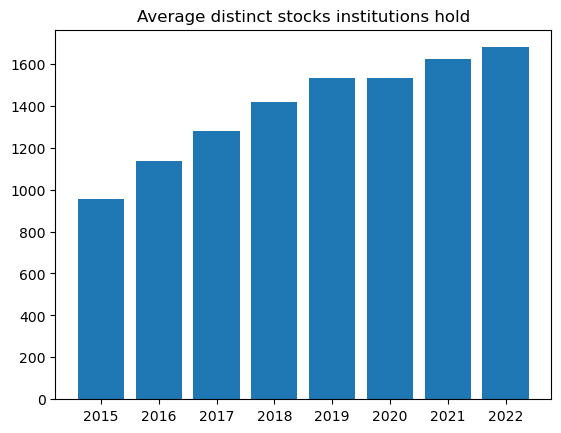

In [5]:
plt.bar(stks.index, stks)
plt.title('Average distinct stocks institutions hold')

- Time-series: the big hedge funds tend to hold more stocks year by year.
- Cross-sectional: the big hedge funds tend to hold more stocks than the average value of all institutions (1500 vs 150), showing the importance of diversification.

## Portfolio Top Holding Analysis


In [6]:
df = holdings[holdings['date'] == '2022-09-30']
df['holding'] = df['shares_adj'] * df['prc']
df = df.sort_values(['mgrno', 'holding'], ascending=False)
df = df[df['gics1'] != 'Unknown']
df

,date,mgrno,shares_adj,trade,prc,vol,openprc,askhi,bidlo,ret,shrout,comnam,ticker,gics1,gics2,year,permno,holding
4824188,2022-09-30,75106.0,1.677982e+06,1.222182e+06,267.0000,3710815.0,265.51001,271.48999,257.02011,0.010292,144001.0,I D E C PHARMACEUTICALS CORP,IDPH,Health Care,"Pharmaceuticals, Biotechnology & Life Sciences",2022.0,76841,4.480212e+08
6434260,2022-09-30,75106.0,3.958008e+06,1.908986e+06,86.9600,2946049.0,88.46000,89.03000,86.82000,-0.011931,523965.0,FIRST STOP PROFESSIONAL SVCS,FIST,Consumer Staples,"Food, Beverage & Tobacco",2022.0,88031,3.441884e+08
7420228,2022-09-30,75106.0,2.283835e+06,-5.726200e+05,134.1700,6180507.0,134.95000,136.20000,133.97000,-0.003491,1250104.0,METROPCS COMMUNICATIONS INC,PCS,Communication Services,Telecommunication Services,2022.0,91937,3.064221e+08
1271420,2022-09-30,75106.0,3.531072e+06,2.932273e+06,79.9900,17116869.0,78.74000,81.78000,78.65000,0.011763,1135511.0,ALIBABA GROUP HOLDING LTD,BABA,Consumer Discretionary,Consumer Discretionary Distribution & Retail,2022.0,14888,2.824504e+08
5160057,2022-09-30,75106.0,4.811660e+06,2.839681e+06,54.8400,7534875.0,55.21000,55.72000,54.76000,-0.001275,610917.0,ZENECA GROUP PLC,ZEN,Health Care,"Pharmaceuticals, Biotechnology & Life Sciences",2022.0,79363,2.638714e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4640411,2022-09-30,6132.0,6.483680e+03,-5.816800e+04,9.2600,1541629.0,8.89000,9.31000,8.83500,0.051078,85373.0,ANGELES PARTICIPATING MTG TRUST,APT,Real Estate,Equity Real Estate Investment Trusts (REITs),2022.0,75846,6.003888e+04
1357965,2022-09-30,6132.0,2.425200e+04,1.319000e+04,2.4600,8690296.0,2.36000,2.58000,2.34000,0.029289,235266.0,INVITAE CORP,NVTA,Health Care,Health Care Equipment & Services,2022.0,15198,5.965992e+04
2077025,2022-09-30,6132.0,3.115500e+04,2.080300e+04,1.8750,3893153.0,1.95000,1.98500,1.87000,-0.053030,299868.0,HENNESSY CAPITAL ACQ CORP IV,HCAC,Consumer Discretionary,Automobiles & Components,2022.0,18558,5.841562e+04
7660289,2022-09-30,6132.0,6.234750e+03,1.575000e+01,3.3200,4770092.0,3.34000,3.44000,3.31000,0.005764,344441.0,TWO HARBORS INVESTMENT CORP,TWO,Financials,Financial Services,2022.0,93070,2.069937e+04


In [7]:
def draw_pie_chart_sector(df, name):
    # Count the occurrences of each category in 'gics1' column
    gics_counts = df['gics1'].value_counts()

    # Plot
    plt.pie(gics_counts, labels=gics_counts.index, autopct='%1.1f%%')
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.title('Distribution of GICS Sector Categories: ' + name)
    plt.show()

def draw_pie_chart_industry_group(df, name):
    # Count the occurrences of each category in 'gics1' column
    gics_counts = df['gics2'].value_counts()

    # Plot
    plt.pie(gics_counts, labels=gics_counts.index, autopct='%1.1f%%')
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.title('Distribution of GICS Industry Group Categories: ' + name)
    plt.show()

In [8]:
def top_holdings(no, name):
    print(name)
    display(df[df['mgrno'] == no].head(10)[['comnam']])
    draw_pie_chart_sector(df[df['mgrno'] == no].head(10), name)
    draw_pie_chart_industry_group(df[df['mgrno'] == no].head(10), name)

Overall


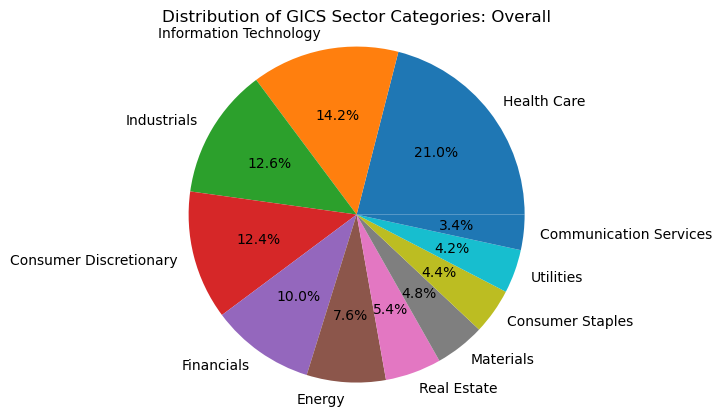

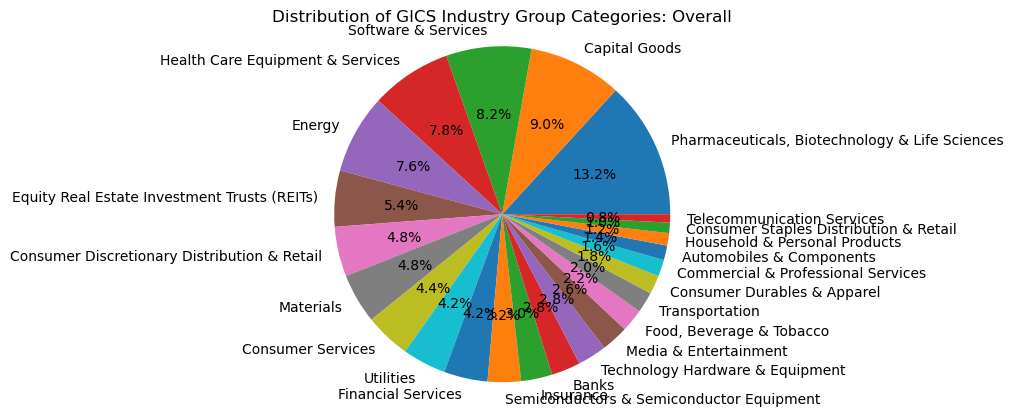

In [9]:
# Overall
name = 'Overall'
print(name)
draw_pie_chart_sector(df.head(500), name)
draw_pie_chart_industry_group(df.head(500), name)

Citadel


,comnam
5844457,AMAZON COM INC
7761560,TESLA MOTORS INC
1175323,APPLE COMPUTER INC
3429475,CHEMICAL NEW YORK CORP
4948526,BOSTON SCIENTIFIC CORP
3462334,EXTENDICARE INC
6974328,SALESFORCE COM INC
7648240,AVAGO TECHNOLOGIES LTD
60441,MICROSOFT CORP
4277151,FIRST BANK SYSTEM INC


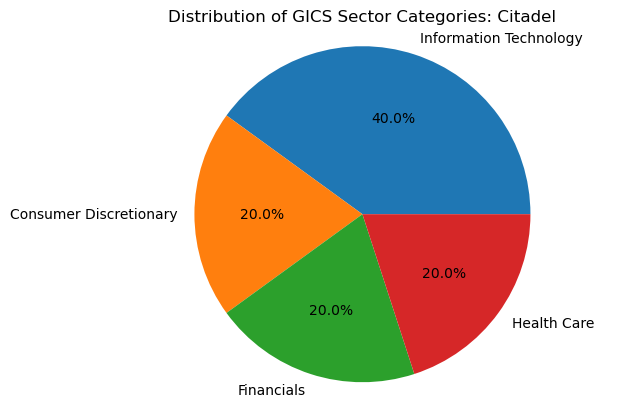

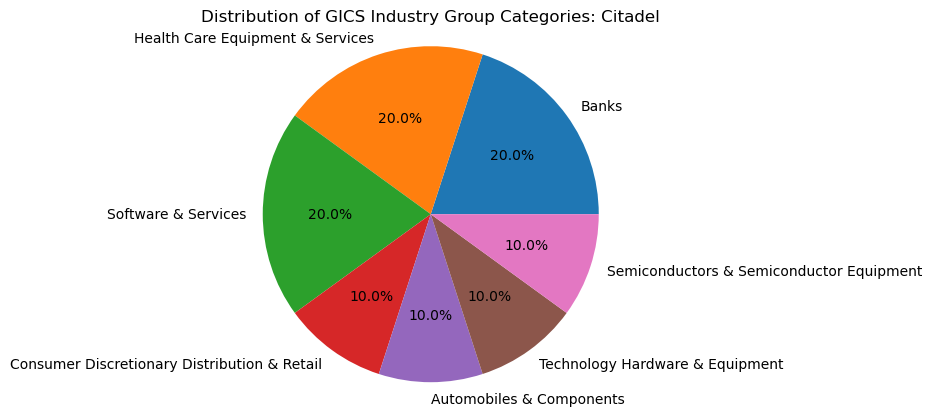

Millennium


,comnam
1093796,STANDARD OIL CO CALIFORNIA
5845008,AMAZON COM INC
7761936,TESLA MOTORS INC
5193398,ACTIVISION INC NEW
1175896,APPLE COMPUTER INC
3481892,UNION PACIFIC CORP
61034,MICROSOFT CORP
7332196,EXLSERVICE HOLDINGS INC
2887657,BAXTER LABS INC
3462442,EXTENDICARE INC


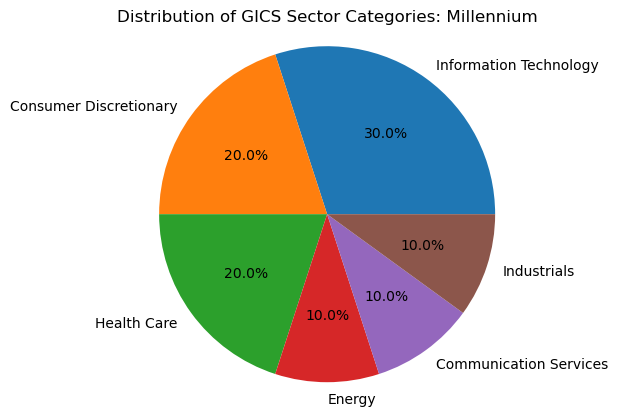

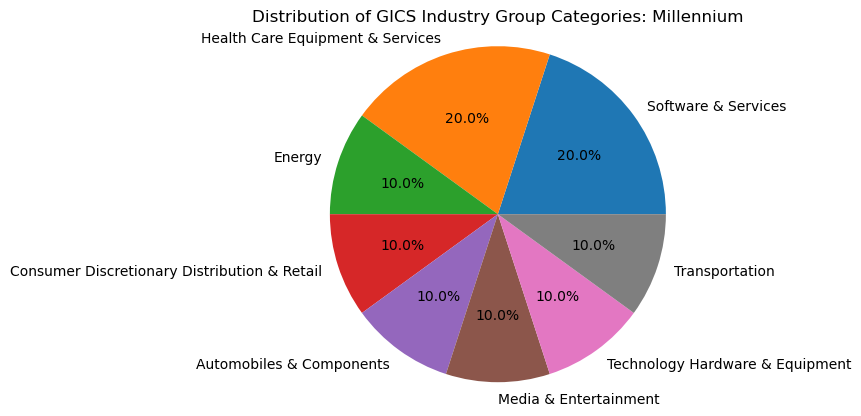

B.A.M.


,comnam
242640,EATON AXLE & SPRING CO
3481082,UNION PACIFIC CORP
3985808,ANALOG DEVICES INC
59375,MICROSOFT CORP
4302549,HOME DEPOT INC
6434033,FIRST STOP PROFESSIONAL SVCS
5843471,AMAZON COM INC
1927732,UNITED AIRCRAFT & TRANS CORP
2887339,BAXTER LABS INC
6483711,INTUITIVE SURGICAL INC


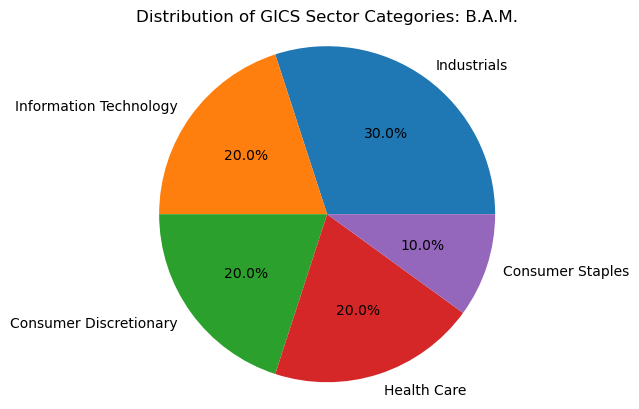

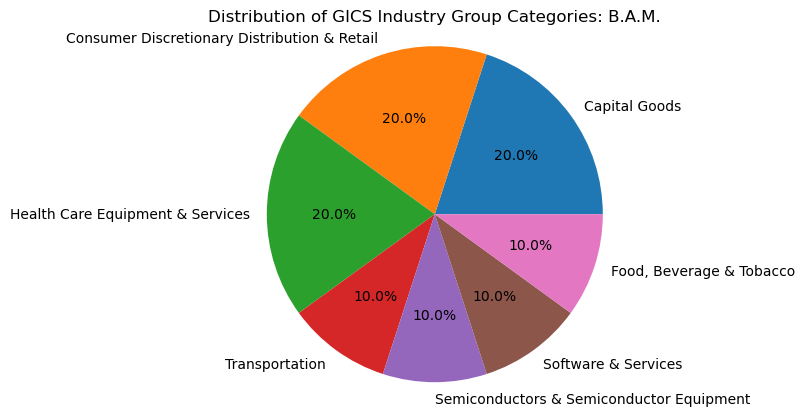

Point72


,comnam
4824188,I D E C PHARMACEUTICALS CORP
6434260,FIRST STOP PROFESSIONAL SVCS
7420228,METROPCS COMMUNICATIONS INC
1271420,ALIBABA GROUP HOLDING LTD
5160057,ZENECA GROUP PLC
650251,FACEBOOK INC
6604924,CERTEGY INC
674265,PALO ALTO NETWORKS INC
1218565,ARISTA NETWORKS INC
61069,MICROSOFT CORP


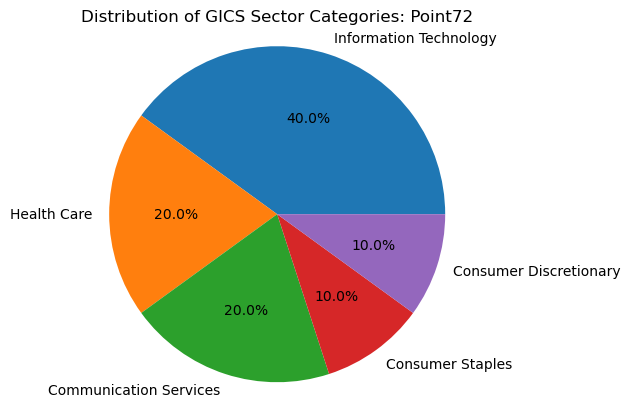

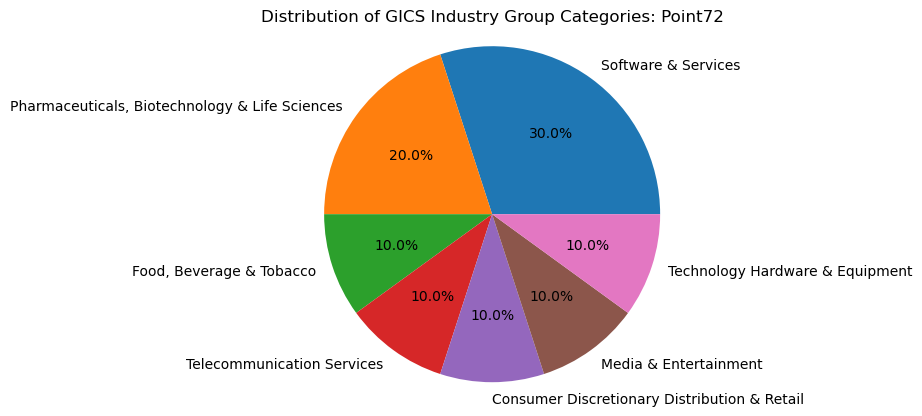

AQR


,comnam
1174173,APPLE COMPUTER INC
59213,MICROSOFT CORP
7026286,GOOGLE INC
5952681,TAIWAN SEMICONDUCTOR MFG CO LTD
2465656,PFIZER CHAS & CO INC
5843322,AMAZON COM INC
7760815,TESLA MOTORS INC
278227,STANDARD OIL CO N J
1796417,MELVILLE SHOE CORP
649042,FACEBOOK INC


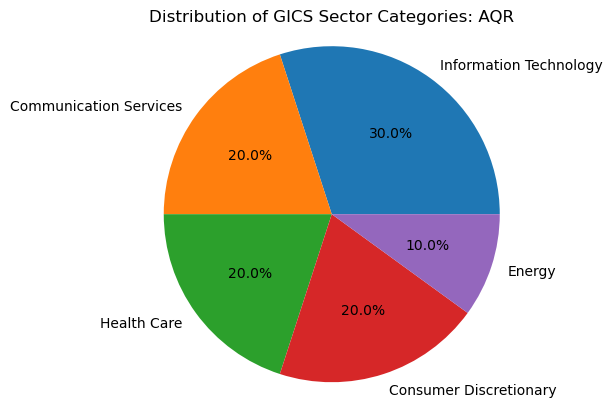

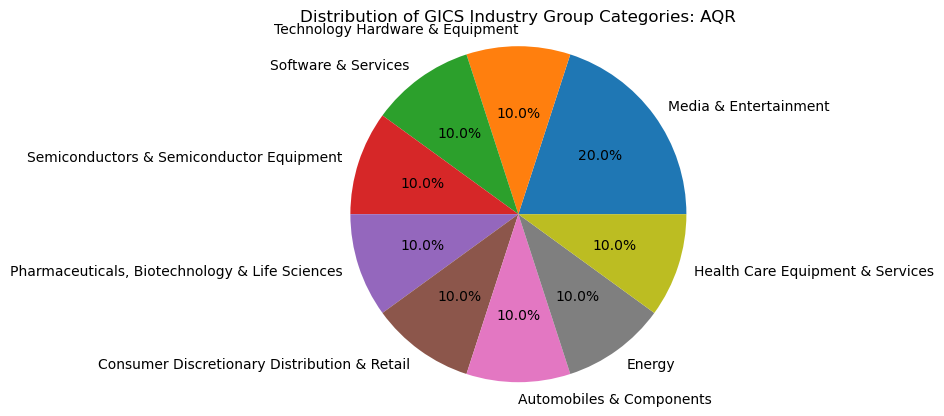

In [10]:
top_holdings(16210, 'Citadel')
top_holdings(57986, 'Millennium')
top_holdings(7808, 'B.A.M.')
top_holdings(75106, 'Point72')
top_holdings(6132, 'AQR')

As we reflect on the landscape at the end of 2022, it's evident that hedge funds have embraced a strategy of diversification, spreading their investments across a variety of sectors and industry groups. This approach underscores the value they place on diversification as a means of optimizing their portfolios.

Additionally, an analysis of the sector distribution among the top 10 holdings of these funds reveals a clear preference for Information Technology, Health Care, Consumer Discretionary, and Communication Services. This preference indicates a consensus belief among hedge funds that these sectors are poised for growth in the foreseeable future.

Delving deeper into the industry group level, we observe distinct investment patterns among the top five hedge funds, each with its unique strategy:

- Citadel has shown a strong inclination towards Banks, Health Care, and Software, indicating a diversified approach within both the financial services and technology sectors.
- Millennium shares similarities with Citadel, especially in its focus on Health Care and Software, although it notably steers clear of significant investments in the Banking sector.
- B.A.M. distinguishes itself with a pronounced preference for Consumer Discretionary and Capital Goods, signaling a belief in the growth potential of these consumer-driven and industrial sectors.
- Point72 exhibits a targeted approach towards Software and Biotech, suggesting a strong conviction in the innovative capacities and future prospects of these industries.
- AQR adopts a more balanced stance, with its largest holdings in Media and Entertainment, reflecting an anticipation of growth in these content-driven areas.

These strategic variations highlight the diverse approaches and outlooks hedge funds have towards capital allocation, driven by their individual assessments of potential growth areas within the broader market.